## 1.下载Wikipedia中文语料库
zhwiki-20190720-pages-articles-multistream.xml.bz2

## 2. 通过WikiExtrctor提取语料库
将提取的语料库存到两个文件中（1000M/document）：wiki_00，wiki_01

## 3. 使用opencc将文件中的繁体字转换为简体字
转换的文件wiki_00.txt，wiki_01.txt

In [5]:
pip install opencc

  Stored in directory: /Users/zhangtingshuo/Library/Caches/pip/wheels/a2/fc/85/880732d25bda4ada0c4b4e505483dcfcac117e70511e9156aa
Successfully built opencc
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import opencc

In [2]:
cc = opencc.OpenCC('t2s')
print(cc.convert('Open Chinese Convert（OpenCC）「開放中文轉換」，是一個致力於中文簡繁轉換的項目，提供高質量詞庫和函數庫(libopencc)。'))

Open Chinese Convert（OpenCC）「开放中文转换」，是一个致力于中文简繁转换的项目，提供高质量词库和函数库(libopencc)。


## 4. 正则剔除语料库无效内容
WikiExtractor提取语料库内容储存到文件中时存在较多空行以及</doc...>和<doc\>，通过正则表达式将这一部分内容剔除<br> 再将处理过后的语料库内容进行jieba分词，对后面word2vec模型训练做准备

In [2]:
import re
import jieba

In [41]:
def parse_wiki(input_path, output_path):
    
    remove_part = '[^<doc>.*]|[^</doc>]' #想要移除的部分的正则表达式
    
    input_wiki = open(input_path, 'r', encoding='utf-8')
    
    article = ''
    
    times = 0
    
    with open(output_path, 'w') as o:
        
        for line in input_wiki.readlines():
            
            line = line.strip('\n') # 读取文件时每行会有看不到的\n,去除这部分
            
            if line=='': continue # 如果是空行，continue循环
                
            match_result = re.match(remove_part, line) # 正则匹配match，包含正则表达式的部分将被剔除
            
            if match_result: 
                
                words = jieba.cut(line) # 将不包含无效内容的句子进行jieba分词为之后模型训练准备
                for word in words: article += word + ' '
                    
                o.write(article + '\n') # 将最终结果保存到新文件中
                
                article = ''
                
            times += 1 # 检测输出结果，每一万行输出一下检测程序是否正常进行
            if times%10000 == 0:
                print(times)
                

In [45]:
parse_wiki('/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/wiki_00.txt', '/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/wiki_clean_00.txt')

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

In [46]:
parse_wiki('/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/wiki_01.txt', '/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/wiki_clean_01.txt')

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

将两个处理过的语料库文件合并到一块，方便训练模型

In [4]:
def merge(input_path, output_path):
    times = 0
    with open(output_path, 'w') as o:
        for path in input_path:
            input_wiki = open(path, 'r', encoding='utf-8')
            for line in input_wiki:
                line = ''.join(line).replace('，', '').replace('。', '').replace('？', '').replace('！', '') \
                .replace('“', '').replace('”', '').replace('：', '').replace('…', '').replace('（', '').replace('）', '') \
                .replace('—', '').replace('《', '').replace('》', '').replace('、', '').replace('‘', '') \
                .replace('’', '').replace('"', '').replace('.', '').replace('「', '').replace('」', '').replace(';', '') \
                .replace('{', '').replace('}', '').replace('/', '').replace('·', '').replace('；', '').replace('?', '') \
                .replace(',', '').replace('-', '').replace('[', '').replace(']', '').replace('*', '').replace(':', '') \
                .replace('(', '').replace(')', '').replace("'", '').replace('<', '').replace('>', '').replace('『', '') \
                .replace('』', '') # 去掉标点符号
                o.write(line + '\n')
                times += 1
                if times%500000 == 0: print(times)

In [5]:
# just a test
input_path = ['tttttt.txt', 'test.txt']
merge(input_path, '1234.txt')

In [19]:
# 输入input path
input_path = ['/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/wiki_clean_00.txt',
'/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/wiki_clean_01.txt']

# output path
output_path='/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/zhwiki_merge.txt'

merge(input_path, output_path)

500000
1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000
5500000


## 5. 通过genism库进行模型训练 

In [1]:
pip install gensim

     |████████████████████████████████| 24.7MB 31kB/s eta 0:00:015    |██▉                             | 2.2MB 24kB/s eta 0:15:09     |██████████████████████▊         | 17.6MB 47kB/s eta 0:02:32     |████████████████████████████▍   | 21.9MB 21kB/s eta 0:02:09
     |████████████████████████████████| 71kB 19kB/s eta 0:00:01
     |████████████████████████████████| 133kB 23kB/s eta 0:00:01
     |████████████████████████████████| 71kB 32kB/s eta 0:00:01
     |████████████████████████████████| 5.6MB 33kB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-1.8.4-cp37-none-any.whl size=68202 sha256=ccb17558bfe9bdb7c7d5735aa945355eaebf145c5b6ac7aa2353de97f25209b1
  Stored in directory: /Users/zhangtingshuo/Library/Caches/pip/wheels/5f/ea/fb/5b1a947b369724063b2617011f1540c44eb00e28c3d2ca8692
Successfully built smart-open
Note: you may need to restart the kernel to use updated packages.


In [1]:
from gensim.models import word2vec
import logging

In [3]:
def trainging(save_path):
    
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    
    # LineSentence 对语料库文件进行处理
    sentences = word2vec.LineSentence('/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/zhwiki_merge.txt')
    
    # 训练模型
    model = word2vec.Word2Vec(sentences, size = 250, hs=1)
    
    # save the model for future utilizing
    model.save(save_path)
    
    model.wv.save_word2vec_format('test_wiki' + ".bin", binary=True)

In [139]:
# 输入储存模型的path
save_path ='/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/zhwiki.model'

trainging(save_path)

2019-08-03 19:25:31,874 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-08-03 19:25:31,876 : INFO : collecting all words and their counts
2019-08-03 19:25:31,882 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-08-03 19:25:32,186 : INFO : PROGRESS: at sentence #10000, processed 759376 words, keeping 77414 word types
2019-08-03 19:25:32,456 : INFO : PROGRESS: at sentence #20000, processed 1414372 words, keeping 113939 word types
2019-08-03 19:25:32,723 : INFO : PROGRESS: at sentence #30000, processed 2110546 words, keeping 145584 word types
2019-08-03 19:25:32,960 : INFO : PROGRESS: at sentence #40000, processed 2737604 words, keeping 168679 word types
2019-08-03 19:25:33,265 : INFO : PROGRESS: at sentence #50000, processed 3370095 words, keeping 191808 word types
2019-08-03 19:25:33,487 : INFO : PROGRESS: at sentence #60000, processed 3998304 words, keeping 213874 word types
2019-08-03 19:25:33,809 : INFO : PROGRESS

2019-08-03 19:25:46,599 : INFO : PROGRESS: at sentence #700000, processed 37207614 words, keeping 882224 word types
2019-08-03 19:25:46,811 : INFO : PROGRESS: at sentence #710000, processed 37630879 words, keeping 888866 word types
2019-08-03 19:25:47,047 : INFO : PROGRESS: at sentence #720000, processed 38141572 words, keeping 896360 word types
2019-08-03 19:25:47,228 : INFO : PROGRESS: at sentence #730000, processed 38622799 words, keeping 903580 word types
2019-08-03 19:25:47,411 : INFO : PROGRESS: at sentence #740000, processed 39119294 words, keeping 910693 word types
2019-08-03 19:25:47,602 : INFO : PROGRESS: at sentence #750000, processed 39601216 words, keeping 918412 word types
2019-08-03 19:25:47,825 : INFO : PROGRESS: at sentence #760000, processed 40067753 words, keeping 925525 word types
2019-08-03 19:25:48,069 : INFO : PROGRESS: at sentence #770000, processed 40523010 words, keeping 931798 word types
2019-08-03 19:25:48,258 : INFO : PROGRESS: at sentence #780000, processe

2019-08-03 19:26:00,207 : INFO : PROGRESS: at sentence #1400000, processed 67368018 words, keeping 1296461 word types
2019-08-03 19:26:00,433 : INFO : PROGRESS: at sentence #1410000, processed 67767896 words, keeping 1301527 word types
2019-08-03 19:26:00,628 : INFO : PROGRESS: at sentence #1420000, processed 68154836 words, keeping 1305972 word types
2019-08-03 19:26:00,800 : INFO : PROGRESS: at sentence #1430000, processed 68570616 words, keeping 1311243 word types
2019-08-03 19:26:00,970 : INFO : PROGRESS: at sentence #1440000, processed 68965355 words, keeping 1315882 word types
2019-08-03 19:26:01,153 : INFO : PROGRESS: at sentence #1450000, processed 69364262 words, keeping 1320574 word types
2019-08-03 19:26:01,332 : INFO : PROGRESS: at sentence #1460000, processed 69756899 words, keeping 1324991 word types
2019-08-03 19:26:01,495 : INFO : PROGRESS: at sentence #1470000, processed 70163212 words, keeping 1330017 word types
2019-08-03 19:26:01,671 : INFO : PROGRESS: at sentence #

2019-08-03 19:26:12,680 : INFO : PROGRESS: at sentence #2100000, processed 94038263 words, keeping 1625158 word types
2019-08-03 19:26:12,867 : INFO : PROGRESS: at sentence #2110000, processed 94415846 words, keeping 1629406 word types
2019-08-03 19:26:13,031 : INFO : PROGRESS: at sentence #2120000, processed 94802000 words, keeping 1634013 word types
2019-08-03 19:26:13,207 : INFO : PROGRESS: at sentence #2130000, processed 95195497 words, keeping 1638365 word types
2019-08-03 19:26:13,379 : INFO : PROGRESS: at sentence #2140000, processed 95582665 words, keeping 1642695 word types
2019-08-03 19:26:13,543 : INFO : PROGRESS: at sentence #2150000, processed 95987840 words, keeping 1649455 word types
2019-08-03 19:26:13,705 : INFO : PROGRESS: at sentence #2160000, processed 96386608 words, keeping 1654898 word types
2019-08-03 19:26:13,874 : INFO : PROGRESS: at sentence #2170000, processed 96789267 words, keeping 1659787 word types
2019-08-03 19:26:14,072 : INFO : PROGRESS: at sentence #

2019-08-03 19:26:24,536 : INFO : PROGRESS: at sentence #2790000, processed 119750162 words, keeping 1940299 word types
2019-08-03 19:26:24,603 : INFO : PROGRESS: at sentence #2800000, processed 119879148 words, keeping 1943343 word types
2019-08-03 19:26:24,666 : INFO : PROGRESS: at sentence #2810000, processed 119995330 words, keeping 1945495 word types
2019-08-03 19:26:24,721 : INFO : PROGRESS: at sentence #2820000, processed 120088717 words, keeping 1947695 word types
2019-08-03 19:26:24,809 : INFO : PROGRESS: at sentence #2830000, processed 120286129 words, keeping 1950231 word types
2019-08-03 19:26:24,900 : INFO : PROGRESS: at sentence #2840000, processed 120495532 words, keeping 1953033 word types
2019-08-03 19:26:24,964 : INFO : PROGRESS: at sentence #2850000, processed 120615970 words, keeping 1955479 word types
2019-08-03 19:26:25,040 : INFO : PROGRESS: at sentence #2860000, processed 120771251 words, keeping 1958089 word types
2019-08-03 19:26:25,144 : INFO : PROGRESS: at se

2019-08-03 19:26:31,679 : INFO : PROGRESS: at sentence #3480000, processed 135534622 words, keeping 2154466 word types
2019-08-03 19:26:31,733 : INFO : PROGRESS: at sentence #3490000, processed 135631931 words, keeping 2155652 word types
2019-08-03 19:26:31,784 : INFO : PROGRESS: at sentence #3500000, processed 135719712 words, keeping 2156668 word types
2019-08-03 19:26:31,853 : INFO : PROGRESS: at sentence #3510000, processed 135848000 words, keeping 2158308 word types
2019-08-03 19:26:31,957 : INFO : PROGRESS: at sentence #3520000, processed 136059331 words, keeping 2161514 word types
2019-08-03 19:26:32,042 : INFO : PROGRESS: at sentence #3530000, processed 136217596 words, keeping 2164095 word types
2019-08-03 19:26:32,118 : INFO : PROGRESS: at sentence #3540000, processed 136360729 words, keeping 2168367 word types
2019-08-03 19:26:32,206 : INFO : PROGRESS: at sentence #3550000, processed 136544432 words, keeping 2173662 word types
2019-08-03 19:26:32,341 : INFO : PROGRESS: at se

2019-08-03 19:26:41,956 : INFO : PROGRESS: at sentence #4170000, processed 159069372 words, keeping 2391662 word types
2019-08-03 19:26:42,116 : INFO : PROGRESS: at sentence #4180000, processed 159419689 words, keeping 2395048 word types
2019-08-03 19:26:42,285 : INFO : PROGRESS: at sentence #4190000, processed 159757721 words, keeping 2398582 word types
2019-08-03 19:26:42,455 : INFO : PROGRESS: at sentence #4200000, processed 160116461 words, keeping 2402035 word types
2019-08-03 19:26:42,620 : INFO : PROGRESS: at sentence #4210000, processed 160482697 words, keeping 2405183 word types
2019-08-03 19:26:42,767 : INFO : PROGRESS: at sentence #4220000, processed 160802899 words, keeping 2408511 word types
2019-08-03 19:26:42,948 : INFO : PROGRESS: at sentence #4230000, processed 161186626 words, keeping 2411787 word types
2019-08-03 19:26:43,127 : INFO : PROGRESS: at sentence #4240000, processed 161591055 words, keeping 2415228 word types
2019-08-03 19:26:43,321 : INFO : PROGRESS: at se

2019-08-03 19:26:54,335 : INFO : PROGRESS: at sentence #4860000, processed 184657368 words, keeping 2613750 word types
2019-08-03 19:26:54,569 : INFO : PROGRESS: at sentence #4870000, processed 185064087 words, keeping 2617483 word types
2019-08-03 19:26:54,749 : INFO : PROGRESS: at sentence #4880000, processed 185427046 words, keeping 2620533 word types
2019-08-03 19:26:54,928 : INFO : PROGRESS: at sentence #4890000, processed 185794508 words, keeping 2623473 word types
2019-08-03 19:26:55,151 : INFO : PROGRESS: at sentence #4900000, processed 186208873 words, keeping 2627129 word types
2019-08-03 19:26:55,302 : INFO : PROGRESS: at sentence #4910000, processed 186585146 words, keeping 2630304 word types
2019-08-03 19:26:55,459 : INFO : PROGRESS: at sentence #4920000, processed 186969035 words, keeping 2633879 word types
2019-08-03 19:26:55,639 : INFO : PROGRESS: at sentence #4930000, processed 187338306 words, keeping 2637212 word types
2019-08-03 19:26:55,832 : INFO : PROGRESS: at se

2019-08-03 19:27:08,946 : INFO : sample=0.001 downsamples 22 most-common words
2019-08-03 19:27:08,947 : INFO : downsampling leaves estimated 185111117 word corpus (90.6% of prior 204386852)
2019-08-03 19:27:09,821 : INFO : constructing a huffman tree from 672967 words
2019-08-03 19:27:33,114 : INFO : built huffman tree with maximum node depth 25
2019-08-03 19:27:34,770 : INFO : estimated required memory for 672967 words and 250 dimensions: 2489977900 bytes
2019-08-03 19:27:34,771 : INFO : resetting layer weights
2019-08-03 19:27:42,412 : INFO : training model with 3 workers on 672967 vocabulary and 250 features, using sg=0 hs=1 sample=0.001 negative=5 window=5
2019-08-03 19:27:43,482 : INFO : EPOCH 1 - PROGRESS: at 0.03% examples, 82228 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:27:44,534 : INFO : EPOCH 1 - PROGRESS: at 0.07% examples, 125317 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:27:45,544 : INFO : EPOCH 1 - PROGRESS: at 0.15% examples, 176175 words/s, in_qsize 4, out_qsi

2019-08-03 19:28:55,064 : INFO : EPOCH 1 - PROGRESS: at 5.45% examples, 211923 words/s, in_qsize 5, out_qsize 1
2019-08-03 19:28:56,596 : INFO : EPOCH 1 - PROGRESS: at 5.47% examples, 208262 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:28:57,760 : INFO : EPOCH 1 - PROGRESS: at 5.49% examples, 205746 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:28:58,803 : INFO : EPOCH 1 - PROGRESS: at 5.51% examples, 203627 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:28:59,840 : INFO : EPOCH 1 - PROGRESS: at 5.53% examples, 201588 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:29:01,420 : INFO : EPOCH 1 - PROGRESS: at 5.56% examples, 198336 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:29:02,769 : INFO : EPOCH 1 - PROGRESS: at 5.58% examples, 195558 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:29:03,973 : INFO : EPOCH 1 - PROGRESS: at 5.59% examples, 193100 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:29:05,092 : INFO : EPOCH 1 - PROGRESS: at 5.62% examples, 191340 words/s, in_qsize 5, out_

2019-08-03 19:30:11,324 : INFO : EPOCH 1 - PROGRESS: at 13.36% examples, 232481 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:30:12,344 : INFO : EPOCH 1 - PROGRESS: at 13.50% examples, 233021 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:30:13,346 : INFO : EPOCH 1 - PROGRESS: at 13.63% examples, 233545 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:30:14,354 : INFO : EPOCH 1 - PROGRESS: at 13.77% examples, 234096 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:30:15,364 : INFO : EPOCH 1 - PROGRESS: at 13.90% examples, 234584 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:30:16,370 : INFO : EPOCH 1 - PROGRESS: at 14.04% examples, 235128 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:30:17,376 : INFO : EPOCH 1 - PROGRESS: at 14.18% examples, 235665 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:30:18,378 : INFO : EPOCH 1 - PROGRESS: at 14.33% examples, 236198 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:30:19,381 : INFO : EPOCH 1 - PROGRESS: at 14.47% examples, 236670 words/s, in_qsiz

2019-08-03 19:31:25,644 : INFO : EPOCH 1 - PROGRESS: at 24.17% examples, 257332 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:31:26,651 : INFO : EPOCH 1 - PROGRESS: at 24.33% examples, 257557 words/s, in_qsize 5, out_qsize 1
2019-08-03 19:31:27,680 : INFO : EPOCH 1 - PROGRESS: at 24.49% examples, 257829 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:31:28,697 : INFO : EPOCH 1 - PROGRESS: at 24.65% examples, 258080 words/s, in_qsize 4, out_qsize 1
2019-08-03 19:31:29,722 : INFO : EPOCH 1 - PROGRESS: at 24.81% examples, 258359 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:31:30,730 : INFO : EPOCH 1 - PROGRESS: at 24.97% examples, 258615 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:31:31,759 : INFO : EPOCH 1 - PROGRESS: at 25.14% examples, 258847 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:31:32,771 : INFO : EPOCH 1 - PROGRESS: at 25.30% examples, 259095 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:31:33,797 : INFO : EPOCH 1 - PROGRESS: at 25.43% examples, 259172 words/s, in_qsiz

2019-08-03 19:32:40,130 : INFO : EPOCH 1 - PROGRESS: at 36.25% examples, 269919 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:32:41,133 : INFO : EPOCH 1 - PROGRESS: at 36.41% examples, 270081 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:32:42,146 : INFO : EPOCH 1 - PROGRESS: at 36.57% examples, 270205 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:32:43,146 : INFO : EPOCH 1 - PROGRESS: at 36.79% examples, 270393 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:32:44,147 : INFO : EPOCH 1 - PROGRESS: at 36.95% examples, 270524 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:32:45,164 : INFO : EPOCH 1 - PROGRESS: at 37.10% examples, 270673 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:32:46,193 : INFO : EPOCH 1 - PROGRESS: at 37.27% examples, 270807 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:32:47,215 : INFO : EPOCH 1 - PROGRESS: at 37.45% examples, 270981 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:32:48,244 : INFO : EPOCH 1 - PROGRESS: at 37.71% examples, 271192 words/s, in_qsiz

2019-08-03 19:33:54,872 : INFO : EPOCH 1 - PROGRESS: at 48.13% examples, 275523 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:33:55,928 : INFO : EPOCH 1 - PROGRESS: at 48.31% examples, 275605 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:33:56,952 : INFO : EPOCH 1 - PROGRESS: at 48.49% examples, 275708 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:33:58,019 : INFO : EPOCH 1 - PROGRESS: at 48.68% examples, 275802 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:33:59,084 : INFO : EPOCH 1 - PROGRESS: at 48.85% examples, 275869 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:34:00,105 : INFO : EPOCH 1 - PROGRESS: at 49.02% examples, 275973 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:34:01,137 : INFO : EPOCH 1 - PROGRESS: at 49.18% examples, 276046 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:34:02,162 : INFO : EPOCH 1 - PROGRESS: at 49.36% examples, 276143 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:34:03,182 : INFO : EPOCH 1 - PROGRESS: at 49.53% examples, 276246 words/s, in_qsiz

2019-08-03 19:35:09,144 : INFO : EPOCH 1 - PROGRESS: at 67.08% examples, 281865 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:35:10,179 : INFO : EPOCH 1 - PROGRESS: at 67.23% examples, 281929 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:35:11,202 : INFO : EPOCH 1 - PROGRESS: at 67.41% examples, 282021 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:35:12,217 : INFO : EPOCH 1 - PROGRESS: at 67.57% examples, 282117 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:35:13,239 : INFO : EPOCH 1 - PROGRESS: at 67.75% examples, 282208 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:35:14,241 : INFO : EPOCH 1 - PROGRESS: at 68.16% examples, 282338 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:35:15,248 : INFO : EPOCH 1 - PROGRESS: at 68.38% examples, 282414 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:35:16,251 : INFO : EPOCH 1 - PROGRESS: at 68.54% examples, 282494 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:35:17,273 : INFO : EPOCH 1 - PROGRESS: at 68.72% examples, 282563 words/s, in_qsiz

2019-08-03 19:36:23,654 : INFO : EPOCH 1 - PROGRESS: at 79.66% examples, 285563 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:36:24,660 : INFO : EPOCH 1 - PROGRESS: at 79.81% examples, 285592 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:36:25,673 : INFO : EPOCH 1 - PROGRESS: at 79.99% examples, 285632 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:36:26,675 : INFO : EPOCH 1 - PROGRESS: at 80.12% examples, 285560 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:36:27,688 : INFO : EPOCH 1 - PROGRESS: at 80.28% examples, 285533 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:36:28,719 : INFO : EPOCH 1 - PROGRESS: at 80.40% examples, 285429 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:36:29,744 : INFO : EPOCH 1 - PROGRESS: at 80.53% examples, 285396 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:36:30,795 : INFO : EPOCH 1 - PROGRESS: at 80.67% examples, 285367 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:36:31,813 : INFO : EPOCH 1 - PROGRESS: at 80.83% examples, 285352 words/s, in_qsiz

2019-08-03 19:37:38,377 : INFO : EPOCH 1 - PROGRESS: at 90.47% examples, 282693 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:37:39,396 : INFO : EPOCH 1 - PROGRESS: at 90.64% examples, 282690 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:37:40,412 : INFO : EPOCH 1 - PROGRESS: at 90.83% examples, 282703 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:37:41,477 : INFO : EPOCH 1 - PROGRESS: at 90.99% examples, 282675 words/s, in_qsize 4, out_qsize 1
2019-08-03 19:37:42,487 : INFO : EPOCH 1 - PROGRESS: at 91.20% examples, 282673 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:37:43,538 : INFO : EPOCH 1 - PROGRESS: at 91.44% examples, 282668 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:37:44,556 : INFO : EPOCH 1 - PROGRESS: at 91.62% examples, 282676 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:37:45,570 : INFO : EPOCH 1 - PROGRESS: at 91.76% examples, 282671 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:37:46,573 : INFO : EPOCH 1 - PROGRESS: at 91.90% examples, 282627 words/s, in_qsiz

2019-08-03 19:38:49,041 : INFO : EPOCH 2 - PROGRESS: at 1.24% examples, 302665 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:38:50,053 : INFO : EPOCH 2 - PROGRESS: at 1.33% examples, 301092 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:38:51,074 : INFO : EPOCH 2 - PROGRESS: at 1.43% examples, 300571 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:38:52,083 : INFO : EPOCH 2 - PROGRESS: at 1.56% examples, 301590 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:38:53,086 : INFO : EPOCH 2 - PROGRESS: at 1.68% examples, 301980 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:38:54,111 : INFO : EPOCH 2 - PROGRESS: at 1.79% examples, 302991 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:38:55,134 : INFO : EPOCH 2 - PROGRESS: at 1.91% examples, 303864 words/s, in_qsize 5, out_qsize 1
2019-08-03 19:38:56,148 : INFO : EPOCH 2 - PROGRESS: at 2.03% examples, 304797 words/s, in_qsize 4, out_qsize 0
2019-08-03 19:38:57,162 : INFO : EPOCH 2 - PROGRESS: at 2.14% examples, 305338 words/s, in_qsize 5, out_

2019-08-03 19:40:04,851 : INFO : EPOCH 2 - PROGRESS: at 9.71% examples, 292179 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:40:05,859 : INFO : EPOCH 2 - PROGRESS: at 9.83% examples, 292159 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:40:06,895 : INFO : EPOCH 2 - PROGRESS: at 9.96% examples, 292243 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:40:07,910 : INFO : EPOCH 2 - PROGRESS: at 10.09% examples, 292188 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:40:08,959 : INFO : EPOCH 2 - PROGRESS: at 10.21% examples, 292328 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:40:09,996 : INFO : EPOCH 2 - PROGRESS: at 10.32% examples, 292042 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:40:11,024 : INFO : EPOCH 2 - PROGRESS: at 10.44% examples, 292061 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:40:12,062 : INFO : EPOCH 2 - PROGRESS: at 10.51% examples, 290757 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:40:13,095 : INFO : EPOCH 2 - PROGRESS: at 10.63% examples, 290580 words/s, in_qsize 5

2019-08-03 19:41:19,654 : INFO : EPOCH 2 - PROGRESS: at 19.31% examples, 287295 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:41:20,677 : INFO : EPOCH 2 - PROGRESS: at 19.45% examples, 287396 words/s, in_qsize 5, out_qsize 1
2019-08-03 19:41:21,721 : INFO : EPOCH 2 - PROGRESS: at 19.59% examples, 287408 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:41:22,744 : INFO : EPOCH 2 - PROGRESS: at 19.74% examples, 287555 words/s, in_qsize 4, out_qsize 1
2019-08-03 19:41:23,756 : INFO : EPOCH 2 - PROGRESS: at 19.88% examples, 287724 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:41:24,791 : INFO : EPOCH 2 - PROGRESS: at 20.03% examples, 287905 words/s, in_qsize 4, out_qsize 1
2019-08-03 19:41:25,814 : INFO : EPOCH 2 - PROGRESS: at 20.17% examples, 288104 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:41:26,840 : INFO : EPOCH 2 - PROGRESS: at 20.32% examples, 288244 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:41:27,848 : INFO : EPOCH 2 - PROGRESS: at 20.47% examples, 288363 words/s, in_qsiz

2019-08-03 19:42:34,448 : INFO : EPOCH 2 - PROGRESS: at 28.93% examples, 280859 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:42:35,458 : INFO : EPOCH 2 - PROGRESS: at 29.09% examples, 281010 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:42:36,479 : INFO : EPOCH 2 - PROGRESS: at 29.25% examples, 281116 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:42:37,483 : INFO : EPOCH 2 - PROGRESS: at 29.41% examples, 281161 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:42:38,547 : INFO : EPOCH 2 - PROGRESS: at 29.53% examples, 280892 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:42:39,582 : INFO : EPOCH 2 - PROGRESS: at 29.85% examples, 280980 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:42:40,596 : INFO : EPOCH 2 - PROGRESS: at 29.99% examples, 280943 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:42:41,627 : INFO : EPOCH 2 - PROGRESS: at 30.16% examples, 280920 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:42:42,678 : INFO : EPOCH 2 - PROGRESS: at 30.31% examples, 280878 words/s, in_qsiz

2019-08-03 19:43:49,157 : INFO : EPOCH 2 - PROGRESS: at 40.75% examples, 282863 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:43:50,176 : INFO : EPOCH 2 - PROGRESS: at 40.93% examples, 282962 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:43:51,191 : INFO : EPOCH 2 - PROGRESS: at 41.08% examples, 282953 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:43:52,197 : INFO : EPOCH 2 - PROGRESS: at 41.24% examples, 282919 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:43:53,243 : INFO : EPOCH 2 - PROGRESS: at 41.38% examples, 282914 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:43:54,250 : INFO : EPOCH 2 - PROGRESS: at 41.52% examples, 282911 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:43:55,259 : INFO : EPOCH 2 - PROGRESS: at 41.66% examples, 282936 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:43:56,266 : INFO : EPOCH 2 - PROGRESS: at 41.79% examples, 282935 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:43:57,285 : INFO : EPOCH 2 - PROGRESS: at 41.95% examples, 282951 words/s, in_qsiz

2019-08-03 19:45:04,001 : INFO : EPOCH 2 - PROGRESS: at 53.64% examples, 280686 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:45:05,016 : INFO : EPOCH 2 - PROGRESS: at 53.83% examples, 280708 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:45:06,029 : INFO : EPOCH 2 - PROGRESS: at 54.03% examples, 280801 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:45:07,052 : INFO : EPOCH 2 - PROGRESS: at 54.21% examples, 280862 words/s, in_qsize 5, out_qsize 1
2019-08-03 19:45:08,061 : INFO : EPOCH 2 - PROGRESS: at 54.40% examples, 280911 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:45:09,069 : INFO : EPOCH 2 - PROGRESS: at 54.62% examples, 280918 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:45:10,083 : INFO : EPOCH 2 - PROGRESS: at 54.85% examples, 280941 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:45:11,107 : INFO : EPOCH 2 - PROGRESS: at 55.06% examples, 280982 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:45:12,159 : INFO : EPOCH 2 - PROGRESS: at 55.29% examples, 281016 words/s, in_qsiz

2019-08-03 19:46:18,606 : INFO : EPOCH 2 - PROGRESS: at 69.00% examples, 278766 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:46:19,662 : INFO : EPOCH 2 - PROGRESS: at 69.13% examples, 278689 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:46:20,700 : INFO : EPOCH 2 - PROGRESS: at 69.25% examples, 278546 words/s, in_qsize 5, out_qsize 1
2019-08-03 19:46:21,727 : INFO : EPOCH 2 - PROGRESS: at 69.41% examples, 278605 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:46:22,739 : INFO : EPOCH 2 - PROGRESS: at 69.58% examples, 278629 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:46:23,754 : INFO : EPOCH 2 - PROGRESS: at 69.72% examples, 278672 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:46:24,782 : INFO : EPOCH 2 - PROGRESS: at 69.89% examples, 278726 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:46:25,811 : INFO : EPOCH 2 - PROGRESS: at 70.06% examples, 278777 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:46:26,851 : INFO : EPOCH 2 - PROGRESS: at 70.22% examples, 278784 words/s, in_qsiz

2019-08-03 19:47:33,271 : INFO : EPOCH 2 - PROGRESS: at 80.22% examples, 278817 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:47:34,397 : INFO : EPOCH 2 - PROGRESS: at 80.38% examples, 278793 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:47:35,409 : INFO : EPOCH 2 - PROGRESS: at 80.50% examples, 278714 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:47:36,412 : INFO : EPOCH 2 - PROGRESS: at 80.64% examples, 278756 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:47:37,445 : INFO : EPOCH 2 - PROGRESS: at 80.80% examples, 278748 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:47:38,465 : INFO : EPOCH 2 - PROGRESS: at 80.93% examples, 278714 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:47:39,478 : INFO : EPOCH 2 - PROGRESS: at 81.08% examples, 278686 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:47:40,484 : INFO : EPOCH 2 - PROGRESS: at 81.24% examples, 278721 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:47:41,500 : INFO : EPOCH 2 - PROGRESS: at 81.43% examples, 278789 words/s, in_qsiz

2019-08-03 19:48:47,917 : INFO : EPOCH 2 - PROGRESS: at 92.62% examples, 281032 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:48:48,931 : INFO : EPOCH 2 - PROGRESS: at 92.74% examples, 280915 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:48:49,985 : INFO : EPOCH 2 - PROGRESS: at 92.88% examples, 280855 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:48:51,089 : INFO : EPOCH 2 - PROGRESS: at 92.94% examples, 280554 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:48:52,124 : INFO : EPOCH 2 - PROGRESS: at 93.09% examples, 280488 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:48:53,164 : INFO : EPOCH 2 - PROGRESS: at 93.23% examples, 280501 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:48:54,223 : INFO : EPOCH 2 - PROGRESS: at 93.39% examples, 280409 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:48:55,257 : INFO : EPOCH 2 - PROGRESS: at 93.56% examples, 280458 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:48:56,258 : INFO : EPOCH 2 - PROGRESS: at 93.74% examples, 280509 words/s, in_qsiz

2019-08-03 19:50:00,663 : INFO : EPOCH 3 - PROGRESS: at 2.30% examples, 263439 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:50:01,674 : INFO : EPOCH 3 - PROGRESS: at 2.42% examples, 264028 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:50:02,692 : INFO : EPOCH 3 - PROGRESS: at 2.52% examples, 264171 words/s, in_qsize 4, out_qsize 1
2019-08-03 19:50:03,707 : INFO : EPOCH 3 - PROGRESS: at 2.63% examples, 264732 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:50:04,711 : INFO : EPOCH 3 - PROGRESS: at 2.71% examples, 264737 words/s, in_qsize 4, out_qsize 1
2019-08-03 19:50:05,766 : INFO : EPOCH 3 - PROGRESS: at 2.82% examples, 264824 words/s, in_qsize 5, out_qsize 1
2019-08-03 19:50:06,804 : INFO : EPOCH 3 - PROGRESS: at 2.92% examples, 265314 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:50:07,819 : INFO : EPOCH 3 - PROGRESS: at 3.02% examples, 264916 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:50:08,838 : INFO : EPOCH 3 - PROGRESS: at 3.10% examples, 264025 words/s, in_qsize 6, out_

2019-08-03 19:51:16,468 : INFO : EPOCH 3 - PROGRESS: at 10.04% examples, 261638 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:51:17,475 : INFO : EPOCH 3 - PROGRESS: at 10.16% examples, 261919 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:51:18,485 : INFO : EPOCH 3 - PROGRESS: at 10.28% examples, 262198 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:51:19,505 : INFO : EPOCH 3 - PROGRESS: at 10.40% examples, 262525 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:51:20,539 : INFO : EPOCH 3 - PROGRESS: at 10.51% examples, 262725 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:51:21,576 : INFO : EPOCH 3 - PROGRESS: at 10.64% examples, 262989 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:51:22,588 : INFO : EPOCH 3 - PROGRESS: at 10.77% examples, 263300 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:51:23,636 : INFO : EPOCH 3 - PROGRESS: at 10.91% examples, 263538 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:51:24,644 : INFO : EPOCH 3 - PROGRESS: at 11.02% examples, 263862 words/s, in_qsiz

2019-08-03 19:52:30,926 : INFO : EPOCH 3 - PROGRESS: at 19.66% examples, 270334 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:52:31,941 : INFO : EPOCH 3 - PROGRESS: at 19.79% examples, 270435 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:52:32,995 : INFO : EPOCH 3 - PROGRESS: at 19.90% examples, 270283 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:52:34,017 : INFO : EPOCH 3 - PROGRESS: at 20.00% examples, 269981 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:52:35,024 : INFO : EPOCH 3 - PROGRESS: at 20.10% examples, 269703 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:52:36,031 : INFO : EPOCH 3 - PROGRESS: at 20.23% examples, 269773 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:52:37,044 : INFO : EPOCH 3 - PROGRESS: at 20.37% examples, 269929 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:52:38,069 : INFO : EPOCH 3 - PROGRESS: at 20.50% examples, 269826 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:52:39,090 : INFO : EPOCH 3 - PROGRESS: at 20.61% examples, 269636 words/s, in_qsiz

2019-08-03 19:53:45,490 : INFO : EPOCH 3 - PROGRESS: at 29.24% examples, 269000 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:53:46,512 : INFO : EPOCH 3 - PROGRESS: at 29.40% examples, 269037 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:53:47,523 : INFO : EPOCH 3 - PROGRESS: at 29.54% examples, 269029 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:53:48,525 : INFO : EPOCH 3 - PROGRESS: at 29.84% examples, 269055 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:53:49,557 : INFO : EPOCH 3 - PROGRESS: at 29.99% examples, 269083 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:53:50,558 : INFO : EPOCH 3 - PROGRESS: at 30.15% examples, 269139 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:53:51,559 : INFO : EPOCH 3 - PROGRESS: at 30.31% examples, 269198 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:53:52,569 : INFO : EPOCH 3 - PROGRESS: at 30.46% examples, 269277 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:53:53,581 : INFO : EPOCH 3 - PROGRESS: at 30.62% examples, 269321 words/s, in_qsiz

2019-08-03 19:55:00,199 : INFO : EPOCH 3 - PROGRESS: at 40.08% examples, 268106 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:55:01,246 : INFO : EPOCH 3 - PROGRESS: at 40.24% examples, 268061 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:55:02,284 : INFO : EPOCH 3 - PROGRESS: at 40.41% examples, 268136 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:55:03,368 : INFO : EPOCH 3 - PROGRESS: at 40.55% examples, 268009 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:55:04,378 : INFO : EPOCH 3 - PROGRESS: at 40.67% examples, 267810 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:55:05,438 : INFO : EPOCH 3 - PROGRESS: at 40.78% examples, 267593 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:55:06,445 : INFO : EPOCH 3 - PROGRESS: at 40.91% examples, 267475 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:55:07,573 : INFO : EPOCH 3 - PROGRESS: at 41.05% examples, 267370 words/s, in_qsize 6, out_qsize 1
2019-08-03 19:55:08,596 : INFO : EPOCH 3 - PROGRESS: at 41.21% examples, 267347 words/s, in_qsiz

2019-08-03 19:56:14,766 : INFO : EPOCH 3 - PROGRESS: at 51.58% examples, 267795 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:56:15,772 : INFO : EPOCH 3 - PROGRESS: at 51.99% examples, 267871 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:56:16,831 : INFO : EPOCH 3 - PROGRESS: at 52.28% examples, 267872 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:56:17,864 : INFO : EPOCH 3 - PROGRESS: at 52.46% examples, 267868 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:56:18,875 : INFO : EPOCH 3 - PROGRESS: at 52.59% examples, 267660 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:56:19,910 : INFO : EPOCH 3 - PROGRESS: at 52.93% examples, 267570 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:56:20,919 : INFO : EPOCH 3 - PROGRESS: at 53.58% examples, 267554 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:56:21,935 : INFO : EPOCH 3 - PROGRESS: at 53.74% examples, 267521 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:56:22,945 : INFO : EPOCH 3 - PROGRESS: at 53.93% examples, 267513 words/s, in_qsiz

2019-08-03 19:57:29,913 : INFO : EPOCH 3 - PROGRESS: at 67.59% examples, 266675 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:57:30,930 : INFO : EPOCH 3 - PROGRESS: at 67.75% examples, 266721 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:57:31,949 : INFO : EPOCH 3 - PROGRESS: at 68.09% examples, 266743 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:57:32,951 : INFO : EPOCH 3 - PROGRESS: at 68.28% examples, 266584 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:57:34,006 : INFO : EPOCH 3 - PROGRESS: at 68.40% examples, 266499 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:57:35,021 : INFO : EPOCH 3 - PROGRESS: at 68.50% examples, 266361 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:57:36,043 : INFO : EPOCH 3 - PROGRESS: at 68.65% examples, 266313 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:57:37,058 : INFO : EPOCH 3 - PROGRESS: at 68.78% examples, 266249 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:57:38,076 : INFO : EPOCH 3 - PROGRESS: at 68.91% examples, 266151 words/s, in_qsiz

2019-08-03 19:58:44,785 : INFO : EPOCH 3 - PROGRESS: at 77.73% examples, 263689 words/s, in_qsize 4, out_qsize 1
2019-08-03 19:58:45,815 : INFO : EPOCH 3 - PROGRESS: at 77.87% examples, 263648 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:58:46,824 : INFO : EPOCH 3 - PROGRESS: at 78.01% examples, 263600 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:58:47,836 : INFO : EPOCH 3 - PROGRESS: at 78.12% examples, 263521 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:58:48,866 : INFO : EPOCH 3 - PROGRESS: at 78.25% examples, 263510 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:58:49,874 : INFO : EPOCH 3 - PROGRESS: at 78.38% examples, 263446 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:58:50,876 : INFO : EPOCH 3 - PROGRESS: at 78.54% examples, 263420 words/s, in_qsize 6, out_qsize 0
2019-08-03 19:58:51,944 : INFO : EPOCH 3 - PROGRESS: at 78.70% examples, 263411 words/s, in_qsize 5, out_qsize 0
2019-08-03 19:58:52,947 : INFO : EPOCH 3 - PROGRESS: at 78.82% examples, 263335 words/s, in_qsiz

2019-08-03 19:59:59,853 : INFO : EPOCH 3 - PROGRESS: at 87.71% examples, 261160 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:00:00,891 : INFO : EPOCH 3 - PROGRESS: at 87.83% examples, 261081 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:00:01,958 : INFO : EPOCH 3 - PROGRESS: at 87.98% examples, 261021 words/s, in_qsize 4, out_qsize 1
2019-08-03 20:00:02,960 : INFO : EPOCH 3 - PROGRESS: at 88.11% examples, 261002 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:00:03,976 : INFO : EPOCH 3 - PROGRESS: at 88.25% examples, 260962 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:00:04,981 : INFO : EPOCH 3 - PROGRESS: at 88.37% examples, 260926 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:00:06,019 : INFO : EPOCH 3 - PROGRESS: at 88.50% examples, 260890 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:00:07,023 : INFO : EPOCH 3 - PROGRESS: at 88.59% examples, 260757 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:00:08,031 : INFO : EPOCH 3 - PROGRESS: at 88.73% examples, 260736 words/s, in_qsiz

2019-08-03 20:01:15,150 : INFO : EPOCH 3 - PROGRESS: at 97.49% examples, 258052 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:01:16,168 : INFO : EPOCH 3 - PROGRESS: at 97.55% examples, 257829 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:01:17,187 : INFO : EPOCH 3 - PROGRESS: at 97.67% examples, 257757 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:01:18,218 : INFO : EPOCH 3 - PROGRESS: at 97.81% examples, 257692 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:01:19,231 : INFO : EPOCH 3 - PROGRESS: at 97.96% examples, 257672 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:01:20,238 : INFO : EPOCH 3 - PROGRESS: at 98.11% examples, 257616 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:01:21,290 : INFO : EPOCH 3 - PROGRESS: at 98.26% examples, 257581 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:01:22,332 : INFO : EPOCH 3 - PROGRESS: at 98.39% examples, 257526 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:01:23,440 : INFO : EPOCH 3 - PROGRESS: at 98.55% examples, 257485 words/s, in_qsiz

2019-08-03 20:02:27,632 : INFO : EPOCH 4 - PROGRESS: at 4.51% examples, 244628 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:02:28,678 : INFO : EPOCH 4 - PROGRESS: at 4.62% examples, 245333 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:02:29,700 : INFO : EPOCH 4 - PROGRESS: at 4.73% examples, 245891 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:02:30,733 : INFO : EPOCH 4 - PROGRESS: at 4.82% examples, 245464 words/s, in_qsize 5, out_qsize 1
2019-08-03 20:02:31,752 : INFO : EPOCH 4 - PROGRESS: at 4.92% examples, 245578 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:02:32,817 : INFO : EPOCH 4 - PROGRESS: at 5.04% examples, 245790 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:02:33,823 : INFO : EPOCH 4 - PROGRESS: at 5.15% examples, 246101 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:02:34,851 : INFO : EPOCH 4 - PROGRESS: at 5.25% examples, 246312 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:02:35,861 : INFO : EPOCH 4 - PROGRESS: at 5.37% examples, 246459 words/s, in_qsize 5, out_

2019-08-03 20:03:43,321 : INFO : EPOCH 4 - PROGRESS: at 11.76% examples, 239208 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:03:44,350 : INFO : EPOCH 4 - PROGRESS: at 11.85% examples, 239092 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:03:45,358 : INFO : EPOCH 4 - PROGRESS: at 11.92% examples, 238536 words/s, in_qsize 5, out_qsize 1
2019-08-03 20:03:46,380 : INFO : EPOCH 4 - PROGRESS: at 12.03% examples, 238571 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:03:47,381 : INFO : EPOCH 4 - PROGRESS: at 12.14% examples, 238570 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:03:48,391 : INFO : EPOCH 4 - PROGRESS: at 12.24% examples, 238691 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:03:49,402 : INFO : EPOCH 4 - PROGRESS: at 12.37% examples, 238930 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:03:50,416 : INFO : EPOCH 4 - PROGRESS: at 12.47% examples, 238905 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:03:51,466 : INFO : EPOCH 4 - PROGRESS: at 12.57% examples, 238764 words/s, in_qsiz

2019-08-03 20:04:58,169 : INFO : EPOCH 4 - PROGRESS: at 20.17% examples, 240353 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:04:59,227 : INFO : EPOCH 4 - PROGRESS: at 20.28% examples, 240239 words/s, in_qsize 5, out_qsize 1
2019-08-03 20:05:00,282 : INFO : EPOCH 4 - PROGRESS: at 20.38% examples, 240044 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:05:01,285 : INFO : EPOCH 4 - PROGRESS: at 20.49% examples, 239998 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:05:02,313 : INFO : EPOCH 4 - PROGRESS: at 20.61% examples, 240007 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:05:03,314 : INFO : EPOCH 4 - PROGRESS: at 20.72% examples, 240038 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:05:04,353 : INFO : EPOCH 4 - PROGRESS: at 20.83% examples, 239940 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:05:05,415 : INFO : EPOCH 4 - PROGRESS: at 20.94% examples, 239992 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:05:06,426 : INFO : EPOCH 4 - PROGRESS: at 21.06% examples, 240022 words/s, in_qsiz

2019-08-03 20:06:14,045 : INFO : EPOCH 4 - PROGRESS: at 28.71% examples, 238066 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:06:15,082 : INFO : EPOCH 4 - PROGRESS: at 28.84% examples, 238172 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:06:16,104 : INFO : EPOCH 4 - PROGRESS: at 28.98% examples, 238286 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:06:17,113 : INFO : EPOCH 4 - PROGRESS: at 29.12% examples, 238444 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:06:18,148 : INFO : EPOCH 4 - PROGRESS: at 29.27% examples, 238577 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:06:19,167 : INFO : EPOCH 4 - PROGRESS: at 29.43% examples, 238724 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:06:20,183 : INFO : EPOCH 4 - PROGRESS: at 29.72% examples, 238820 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:06:21,190 : INFO : EPOCH 4 - PROGRESS: at 29.84% examples, 238757 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:06:22,244 : INFO : EPOCH 4 - PROGRESS: at 29.92% examples, 238438 words/s, in_qsiz

2019-08-03 20:07:29,174 : INFO : EPOCH 4 - PROGRESS: at 38.54% examples, 238078 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:07:30,176 : INFO : EPOCH 4 - PROGRESS: at 38.67% examples, 238057 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:07:31,186 : INFO : EPOCH 4 - PROGRESS: at 38.79% examples, 238032 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:07:32,195 : INFO : EPOCH 4 - PROGRESS: at 38.92% examples, 238054 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:07:33,286 : INFO : EPOCH 4 - PROGRESS: at 39.03% examples, 237985 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:07:34,337 : INFO : EPOCH 4 - PROGRESS: at 39.17% examples, 238053 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:07:35,338 : INFO : EPOCH 4 - PROGRESS: at 39.31% examples, 238105 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:07:36,412 : INFO : EPOCH 4 - PROGRESS: at 39.42% examples, 237985 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:07:37,413 : INFO : EPOCH 4 - PROGRESS: at 39.54% examples, 238035 words/s, in_qsiz

2019-08-03 20:08:43,920 : INFO : EPOCH 4 - PROGRESS: at 48.67% examples, 241073 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:08:44,943 : INFO : EPOCH 4 - PROGRESS: at 48.81% examples, 241099 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:08:45,943 : INFO : EPOCH 4 - PROGRESS: at 48.96% examples, 241179 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:08:46,956 : INFO : EPOCH 4 - PROGRESS: at 49.10% examples, 241254 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:08:47,989 : INFO : EPOCH 4 - PROGRESS: at 49.23% examples, 241255 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:08:49,031 : INFO : EPOCH 4 - PROGRESS: at 49.39% examples, 241351 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:08:50,089 : INFO : EPOCH 4 - PROGRESS: at 49.54% examples, 241399 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:08:51,128 : INFO : EPOCH 4 - PROGRESS: at 49.71% examples, 241518 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:08:52,130 : INFO : EPOCH 4 - PROGRESS: at 49.87% examples, 241576 words/s, in_qsiz

2019-08-03 20:09:58,576 : INFO : EPOCH 4 - PROGRESS: at 65.53% examples, 244254 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:09:59,629 : INFO : EPOCH 4 - PROGRESS: at 65.69% examples, 244309 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:10:00,641 : INFO : EPOCH 4 - PROGRESS: at 65.82% examples, 244258 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:10:01,682 : INFO : EPOCH 4 - PROGRESS: at 65.95% examples, 244109 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:10:02,685 : INFO : EPOCH 4 - PROGRESS: at 66.16% examples, 244158 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:10:03,686 : INFO : EPOCH 4 - PROGRESS: at 66.31% examples, 244205 words/s, in_qsize 4, out_qsize 1
2019-08-03 20:10:04,741 : INFO : EPOCH 4 - PROGRESS: at 66.46% examples, 244274 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:10:05,766 : INFO : EPOCH 4 - PROGRESS: at 66.61% examples, 244356 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:10:06,823 : INFO : EPOCH 4 - PROGRESS: at 66.74% examples, 244355 words/s, in_qsiz

2019-08-03 20:11:13,101 : INFO : EPOCH 4 - PROGRESS: at 76.40% examples, 246682 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:11:14,203 : INFO : EPOCH 4 - PROGRESS: at 76.48% examples, 246442 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:11:15,214 : INFO : EPOCH 4 - PROGRESS: at 76.63% examples, 246410 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:11:16,239 : INFO : EPOCH 4 - PROGRESS: at 76.76% examples, 246359 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:11:17,281 : INFO : EPOCH 4 - PROGRESS: at 76.89% examples, 246376 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:11:18,325 : INFO : EPOCH 4 - PROGRESS: at 77.03% examples, 246407 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:11:19,376 : INFO : EPOCH 4 - PROGRESS: at 77.17% examples, 246423 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:11:20,397 : INFO : EPOCH 4 - PROGRESS: at 77.28% examples, 246405 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:11:21,404 : INFO : EPOCH 4 - PROGRESS: at 77.36% examples, 246253 words/s, in_qsiz

2019-08-03 20:12:27,977 : INFO : EPOCH 4 - PROGRESS: at 87.10% examples, 248264 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:12:29,018 : INFO : EPOCH 4 - PROGRESS: at 87.26% examples, 248278 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:12:30,062 : INFO : EPOCH 4 - PROGRESS: at 87.41% examples, 248342 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:12:31,082 : INFO : EPOCH 4 - PROGRESS: at 87.54% examples, 248385 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:12:32,096 : INFO : EPOCH 4 - PROGRESS: at 87.68% examples, 248406 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:12:33,124 : INFO : EPOCH 4 - PROGRESS: at 87.81% examples, 248410 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:12:34,134 : INFO : EPOCH 4 - PROGRESS: at 87.99% examples, 248463 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:12:35,176 : INFO : EPOCH 4 - PROGRESS: at 88.14% examples, 248489 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:12:36,195 : INFO : EPOCH 4 - PROGRESS: at 88.28% examples, 248509 words/s, in_qsiz

2019-08-03 20:13:42,809 : INFO : EPOCH 4 - PROGRESS: at 97.88% examples, 249279 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:13:43,812 : INFO : EPOCH 4 - PROGRESS: at 98.06% examples, 249323 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:13:44,822 : INFO : EPOCH 4 - PROGRESS: at 98.24% examples, 249364 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:13:45,863 : INFO : EPOCH 4 - PROGRESS: at 98.40% examples, 249395 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:13:46,878 : INFO : EPOCH 4 - PROGRESS: at 98.58% examples, 249436 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:13:47,890 : INFO : EPOCH 4 - PROGRESS: at 98.75% examples, 249477 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:13:48,902 : INFO : EPOCH 4 - PROGRESS: at 98.90% examples, 249508 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:13:49,941 : INFO : EPOCH 4 - PROGRESS: at 99.07% examples, 249502 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:13:50,978 : INFO : EPOCH 4 - PROGRESS: at 99.26% examples, 249569 words/s, in_qsiz

2019-08-03 20:14:54,619 : INFO : EPOCH 5 - PROGRESS: at 5.65% examples, 269319 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:14:55,681 : INFO : EPOCH 5 - PROGRESS: at 5.77% examples, 269262 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:14:56,696 : INFO : EPOCH 5 - PROGRESS: at 5.87% examples, 269136 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:14:57,706 : INFO : EPOCH 5 - PROGRESS: at 5.98% examples, 269156 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:14:58,713 : INFO : EPOCH 5 - PROGRESS: at 6.10% examples, 269353 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:14:59,759 : INFO : EPOCH 5 - PROGRESS: at 6.23% examples, 269650 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:15:00,770 : INFO : EPOCH 5 - PROGRESS: at 6.33% examples, 269679 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:15:02,196 : INFO : EPOCH 5 - PROGRESS: at 6.41% examples, 266568 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:15:03,208 : INFO : EPOCH 5 - PROGRESS: at 6.49% examples, 265199 words/s, in_qsize 5, out_

2019-08-03 20:16:09,710 : INFO : EPOCH 5 - PROGRESS: at 13.69% examples, 263741 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:16:10,720 : INFO : EPOCH 5 - PROGRESS: at 13.81% examples, 263806 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:16:11,726 : INFO : EPOCH 5 - PROGRESS: at 13.89% examples, 263295 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:16:12,768 : INFO : EPOCH 5 - PROGRESS: at 14.01% examples, 263109 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:16:13,854 : INFO : EPOCH 5 - PROGRESS: at 14.04% examples, 261622 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:16:14,884 : INFO : EPOCH 5 - PROGRESS: at 14.12% examples, 261087 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:16:15,900 : INFO : EPOCH 5 - PROGRESS: at 14.21% examples, 260530 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:16:16,957 : INFO : EPOCH 5 - PROGRESS: at 14.29% examples, 259896 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:16:17,959 : INFO : EPOCH 5 - PROGRESS: at 14.39% examples, 259690 words/s, in_qsiz

2019-08-03 20:17:24,227 : INFO : EPOCH 5 - PROGRESS: at 22.93% examples, 263004 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:17:25,250 : INFO : EPOCH 5 - PROGRESS: at 23.06% examples, 262951 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:17:26,252 : INFO : EPOCH 5 - PROGRESS: at 23.19% examples, 263002 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:17:27,282 : INFO : EPOCH 5 - PROGRESS: at 23.33% examples, 263059 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:17:28,294 : INFO : EPOCH 5 - PROGRESS: at 23.48% examples, 263143 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:17:29,329 : INFO : EPOCH 5 - PROGRESS: at 23.61% examples, 263154 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:17:30,375 : INFO : EPOCH 5 - PROGRESS: at 23.75% examples, 263237 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:17:31,387 : INFO : EPOCH 5 - PROGRESS: at 23.89% examples, 263279 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:17:32,407 : INFO : EPOCH 5 - PROGRESS: at 24.03% examples, 263389 words/s, in_qsiz

2019-08-03 20:18:38,923 : INFO : EPOCH 5 - PROGRESS: at 33.14% examples, 264029 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:18:39,963 : INFO : EPOCH 5 - PROGRESS: at 33.37% examples, 264161 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:18:40,970 : INFO : EPOCH 5 - PROGRESS: at 33.63% examples, 264289 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:18:41,975 : INFO : EPOCH 5 - PROGRESS: at 33.80% examples, 264233 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:18:42,981 : INFO : EPOCH 5 - PROGRESS: at 33.92% examples, 264205 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:18:43,984 : INFO : EPOCH 5 - PROGRESS: at 34.06% examples, 264240 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:18:45,004 : INFO : EPOCH 5 - PROGRESS: at 34.23% examples, 264321 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:18:46,018 : INFO : EPOCH 5 - PROGRESS: at 34.39% examples, 264400 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:18:47,024 : INFO : EPOCH 5 - PROGRESS: at 34.58% examples, 264520 words/s, in_qsiz

2019-08-03 20:19:54,359 : INFO : EPOCH 5 - PROGRESS: at 43.25% examples, 260362 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:19:55,360 : INFO : EPOCH 5 - PROGRESS: at 43.38% examples, 260354 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:19:56,367 : INFO : EPOCH 5 - PROGRESS: at 43.52% examples, 260317 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:19:57,378 : INFO : EPOCH 5 - PROGRESS: at 43.66% examples, 260350 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:19:58,382 : INFO : EPOCH 5 - PROGRESS: at 43.80% examples, 260427 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:19:59,414 : INFO : EPOCH 5 - PROGRESS: at 43.94% examples, 260424 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:20:00,432 : INFO : EPOCH 5 - PROGRESS: at 44.07% examples, 260426 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:20:01,447 : INFO : EPOCH 5 - PROGRESS: at 44.20% examples, 260456 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:20:02,486 : INFO : EPOCH 5 - PROGRESS: at 44.34% examples, 260519 words/s, in_qsiz

2019-08-03 20:21:08,928 : INFO : EPOCH 5 - PROGRESS: at 56.57% examples, 261143 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:21:09,991 : INFO : EPOCH 5 - PROGRESS: at 56.68% examples, 260893 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:21:11,030 : INFO : EPOCH 5 - PROGRESS: at 56.87% examples, 260757 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:21:12,668 : INFO : EPOCH 5 - PROGRESS: at 56.91% examples, 259963 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:21:13,703 : INFO : EPOCH 5 - PROGRESS: at 56.98% examples, 259673 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:21:14,728 : INFO : EPOCH 5 - PROGRESS: at 57.21% examples, 259692 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:21:15,849 : INFO : EPOCH 5 - PROGRESS: at 57.35% examples, 259499 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:21:16,903 : INFO : EPOCH 5 - PROGRESS: at 57.53% examples, 259418 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:21:17,908 : INFO : EPOCH 5 - PROGRESS: at 57.80% examples, 259391 words/s, in_qsiz

2019-08-03 20:22:24,443 : INFO : EPOCH 5 - PROGRESS: at 70.87% examples, 260388 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:22:25,447 : INFO : EPOCH 5 - PROGRESS: at 71.03% examples, 260436 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:22:26,506 : INFO : EPOCH 5 - PROGRESS: at 71.19% examples, 260470 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:22:27,535 : INFO : EPOCH 5 - PROGRESS: at 71.34% examples, 260451 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:22:28,551 : INFO : EPOCH 5 - PROGRESS: at 71.50% examples, 260506 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:22:29,569 : INFO : EPOCH 5 - PROGRESS: at 71.65% examples, 260559 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:22:30,708 : INFO : EPOCH 5 - PROGRESS: at 71.80% examples, 260502 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:22:31,724 : INFO : EPOCH 5 - PROGRESS: at 71.93% examples, 260488 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:22:32,750 : INFO : EPOCH 5 - PROGRESS: at 72.08% examples, 260557 words/s, in_qsiz

2019-08-03 20:23:39,080 : INFO : EPOCH 5 - PROGRESS: at 81.38% examples, 260586 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:23:40,089 : INFO : EPOCH 5 - PROGRESS: at 81.57% examples, 260641 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:23:41,101 : INFO : EPOCH 5 - PROGRESS: at 81.76% examples, 260710 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:23:42,128 : INFO : EPOCH 5 - PROGRESS: at 81.91% examples, 260751 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:23:43,149 : INFO : EPOCH 5 - PROGRESS: at 82.08% examples, 260748 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:23:44,157 : INFO : EPOCH 5 - PROGRESS: at 82.23% examples, 260778 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:23:45,189 : INFO : EPOCH 5 - PROGRESS: at 82.40% examples, 260817 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:23:46,227 : INFO : EPOCH 5 - PROGRESS: at 82.57% examples, 260841 words/s, in_qsize 4, out_qsize 1
2019-08-03 20:23:47,247 : INFO : EPOCH 5 - PROGRESS: at 82.73% examples, 260888 words/s, in_qsiz

2019-08-03 20:24:53,679 : INFO : EPOCH 5 - PROGRESS: at 92.19% examples, 260248 words/s, in_qsize 6, out_qsize 0
2019-08-03 20:24:54,685 : INFO : EPOCH 5 - PROGRESS: at 92.32% examples, 260228 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:24:55,700 : INFO : EPOCH 5 - PROGRESS: at 92.49% examples, 260256 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:24:56,706 : INFO : EPOCH 5 - PROGRESS: at 92.66% examples, 260303 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:24:57,724 : INFO : EPOCH 5 - PROGRESS: at 92.81% examples, 260347 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:24:58,730 : INFO : EPOCH 5 - PROGRESS: at 92.96% examples, 260355 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:24:59,731 : INFO : EPOCH 5 - PROGRESS: at 93.11% examples, 260377 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:25:00,746 : INFO : EPOCH 5 - PROGRESS: at 93.25% examples, 260379 words/s, in_qsize 5, out_qsize 0
2019-08-03 20:25:01,775 : INFO : EPOCH 5 - PROGRESS: at 93.44% examples, 260431 words/s, in_qsiz

**判断两个词的相似性**

In [2]:
from gensim import models

In [3]:
model = models.Word2Vec.load('/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/zhwiki.model')
# model = word2vec.Word2Vec.load('/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/zhwiki/AA/zhwiki.model')
res = model.wv.similarity('人工智能', '神经网络')
print("similarity:%.4f"%res)

similarity:0.4927


In [4]:
res = model.wv.similarity('重庆', '成都')
print("similarity:%.4f"%res)

similarity:0.7614


In [5]:
word_1 = ['数学']
word_simi = model.wv.most_similar(word_1, topn=20)
print(word_simi)

[('数学分析', 0.7199119925498962), ('微积分', 0.6959272623062134), ('数理逻辑', 0.6902496218681335), ('统计学', 0.6895418763160706), ('高等数学', 0.6793594360351562), ('物理学', 0.6762281060218811), ('物理', 0.6762018203735352), ('逻辑学', 0.6703916192054749), ('线性代数', 0.6665523052215576), ('语言学', 0.6658895611763), ('计算机科学', 0.6609065532684326), ('概率论', 0.6565454006195068), ('纯数学', 0.6542180776596069), ('理论物理', 0.650378942489624), ('数论', 0.6438636779785156), ('几何学', 0.6427381038665771), ('自然科学', 0.6420425176620483), ('群论', 0.6352145671844482), ('天文学', 0.632325291633606), ('力学', 0.62115877866745)]


**接着尝试做一点有趣的小尝试，由于将整个语料库直接可视化看着比较庞大且不清楚，这里选择绘制词云进行可视化**

In [52]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

In [131]:
# 绘制一个mask
def heart_mask():
    x, y = np.ogrid[: 300, : 300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 180 ** 2
    mask = 255 * mask.astype(int)
    return mask

In [150]:
# 绘制wordcloud
def draw_word_cloud(word_cloud):
    wc = WordCloud(background_color='white', mask=heart_mask(), font_path='/Users/zhangtingshuo/Desktop/AI课程/人工智能与自然语言处理-Part4/SimHei.ttf')
    wc.generate_from_frequencies(word_cloud)
    %matplotlib inline
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')

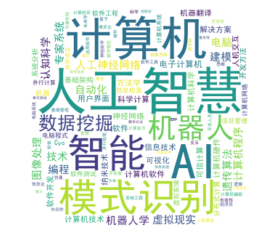

In [151]:
test_word = ['人工智能']
results = model.wv.most_similar(test_word, topn=100)
test_dict = dict()

for i in results:
    test_dict[i[0]] = i[1]
draw_word_cloud(test_dict)

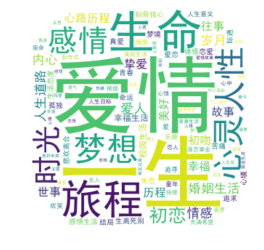

In [152]:
test_word = ['人生']
results = model.wv.most_similar(test_word, topn=100)
test_dict = dict()

for i in results:
    test_dict[i[0]] = i[1]
draw_word_cloud(test_dict)